In [2]:
import csv
import math
import re
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tweepy
from bs4 import BeautifulSoup
#from keras.layers import Dense, Flatten, LSTM
#from keras.layers.embeddings import Embedding
#from keras.models import Sequential
#from keras.preprocessing import sequence
from nltk.corpus import stopwords   # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import 4 months twitter data

In [5]:
#with open('tweetwise_data/tweets_raw.txt','r') as f:
#    text = f.read()

In [3]:
with open('C:/Users/kapilesh/Desktop/224 bitcoin project/tweetwise data/tweets_raw.txt','r',encoding="utf8") as f:
    text = f.read()

In [4]:
text1 = text.split("\n")

In [5]:
list1  = []
for i in text1:
    m = i.split("||")
    #print(m)
    if len(m) == 4:
        list1.append(m)
    

In [6]:
len(list1)

1047175

In [7]:
df = pd.DataFrame(list1)

In [8]:
df.head()

,0,1,2,3
0,CoinbaseBot,The price of bitcoin on @coinbase is now 673.6...,2016-10-27T00:00:41,
1,rjy6utdyi6ruth,RT @RedditBTC: Iceland: Few days before electi...,2016-10-27T00:00:39,
2,BitcoinWorker,Easy and easy and easy mining #bitcoin with cl...,2016-10-27T00:00:30,
3,CoinAcademy,"Bitcoin based social media community, Yours, c...",2016-10-27T00:00:27,
4,FreeCashGifts,"RT @BitcoinMagazine: With TumbleBit, #Bitcoin ...",2016-10-27T00:00:22,


In [9]:
df.drop([0,3], axis=1, inplace=True)

In [10]:
df.columns = ['Text','Date']

In [11]:
df.dtypes

Text    object
Date    object
dtype: object

In [12]:
df.head()

,Text,Date
0,The price of bitcoin on @coinbase is now 673.6...,2016-10-27T00:00:41
1,RT @RedditBTC: Iceland: Few days before electi...,2016-10-27T00:00:39
2,Easy and easy and easy mining #bitcoin with cl...,2016-10-27T00:00:30
3,"Bitcoin based social media community, Yours, c...",2016-10-27T00:00:27
4,"RT @BitcoinMagazine: With TumbleBit, #Bitcoin ...",2016-10-27T00:00:22


In [13]:
df['Date'] = df['Date'].apply(lambda x: x.split('T'))
df = df[df['Date'].map(len) == 2]

In [14]:
df['Date']=df['Date'].apply(lambda x: x[0])

In [15]:
df = df.dropna()

In [16]:
date_list = ['2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30',
       '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
       '2016-11-04', '2016-11-05', '2016-11-06',
       '2016-11-07',  '2016-11-08',
       '2016-11-09', 
       '2016-11-10',
       '2016-11-11', '2016-11-12',  '2016-11-13',
       '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17',
       '2016-11-18', '2016-11-19',
       '2016-11-20',  '2016-11-21',  '2016-11-22','2016-11-23','2016-11-24','2016-11-25','2016-11-26', '2016-11-27','2016-11-28', '2016-11-29','2016-11-30',
       '2016-12-01',
       '2016-12-02',  '2016-12-03', '2016-12-04', 
       '2016-12-05', '2016-12-06', 
       '2016-12-07', '2016-12-08','2016-12-09','2016-12-10', '2016-12-11','2016-12-12', '2016-12-13', '2016-12-14',
       '2016-12-15', '2016-12-16', '2016-12-17', '2016-12-18','2016-12-19', '2016-12-20',
       '2016-12-21','2016-12-22', '2016-12-23','2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29',
       '2016-12-30', '2016-12-31',
       '2017-01-01',  '2017-01-02','2017-01-03', '2017-01-04',  '2017-01-05', '2017-01-06',
       '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       '2017-01-11','2017-01-12', '2017-01-13', '2017-01-14','2017-01-15',
       '2017-01-16',  '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-21',  '2017-01-22', '2017-01-23', '2017-01-24','2017-01-25', '2017-01-26',
       '2017-01-27',  '2017-01-28', '2017-01-29', '2017-01-30',
       '2017-01-31',  '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',  '2017-02-06', '2017-02-07', 
       '2017-02-08', '2017-02-09',  '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
       '2017-02-18', '2017-02-19', 
       '2017-02-20', '2017-02-21', '2017-02-22']

In [17]:
df = df[df['Date'].isin(date_list)]

In [18]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d') )
df['Date'] = df['Date'].dt.date

In [19]:
df.head() # final data with relevant date

,Text,Date
0,The price of bitcoin on @coinbase is now 673.6...,2016-10-27
1,RT @RedditBTC: Iceland: Few days before electi...,2016-10-27
2,Easy and easy and easy mining #bitcoin with cl...,2016-10-27
3,"Bitcoin based social media community, Yours, c...",2016-10-27
4,"RT @BitcoinMagazine: With TumbleBit, #Bitcoin ...",2016-10-27


## Import Bitcoin price data

In [20]:
#btc = pd.read_csv('coindesk-bpi-USD-close_data-2010-07-17_2018-04-06.csv')

In [21]:
btc = pd.read_csv(r'C:\Users\kapilesh\Desktop\224 bitcoin project\coindesk-bpi-USD-close_data-2010-07-17_2018-03-06.csv')    

In [22]:
btc.head()

,Date,Close Price
0,2010-07-18 00:00:00,0.09
1,2010-07-19 00:00:00,0.08
2,2010-07-20 00:00:00,0.07
3,2010-07-21 00:00:00,0.08
4,2010-07-22 00:00:00,0.05


In [23]:
btc= btc[btc['Date']!='This data was produced from the CoinDesk price page.']
btc= btc[btc['Date']!='http://www.coindesk.com/price/']

In [24]:
btc['Date'] = btc['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S') )
btc['Date'] = btc['Date'].dt.date

In [25]:
btc['Returns'] = btc['Close Price'].diff()

In [26]:
btc.head()

,Date,Close Price,Returns
0,2010-07-18,0.09,NaN
1,2010-07-19,0.08,-0.01
2,2010-07-20,0.07,-0.01
3,2010-07-21,0.08,0.01
4,2010-07-22,0.05,-0.03


In [27]:
data = df.merge(btc, how='left', on='Date')

In [28]:
df.shape

(1045025, 2)

In [29]:
btc.shape

(2789, 3)

In [30]:
data.shape

(1045025, 4)

In [31]:
data.head() # Merged dataset

,Text,Date,Close Price,Returns
0,The price of bitcoin on @coinbase is now 673.6...,2016-10-27,686.52,12.16
1,RT @RedditBTC: Iceland: Few days before electi...,2016-10-27,686.52,12.16
2,Easy and easy and easy mining #bitcoin with cl...,2016-10-27,686.52,12.16
3,"Bitcoin based social media community, Yours, c...",2016-10-27,686.52,12.16
4,"RT @BitcoinMagazine: With TumbleBit, #Bitcoin ...",2016-10-27,686.52,12.16


## Clean twitter data

In [32]:
def beautify_tweet(raw_tweet):
    tweet_text = BeautifulSoup(raw_tweet, "lxml").get_text()
    letters_only = re.sub("[^a-zA-Z]"," ", tweet_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stopwords.words("english")]
    return( " ".join( meaningful_words ))

In [60]:
data['Text'] = data['Text'].apply( lambda x: beautify_tweet(x))

C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/KZu2omLCYC" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/7BlqSSTWZ2" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/WBjmkQyvJI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that do

C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/rqk2kx4Szk" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/AqOGWp9Bza" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/HuZwzPgDL5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that do

C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/uoTByc…" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/GMUnDJ9B9i" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/ITkWMC3Hxc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that docum

C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/yr410yrz95…" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/zABZpUH6pe…" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kapilesh\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/6ZNTKlx…" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that do

KeyboardInterrupt: 

In [275]:
"""for idx, row in data.iterrows():
    analysis = TextBlob(row['Text'])
    row ['Sentiment Score'] = analysis.sentiment.polarity
    if analysis.sentiment.polarity > 0:
        row['Sentiment'] =  1 # positive
    elif analysis.sentiment.polarity == 0:
        row['Sentiment'] =  0 # neutral
    else:
        row['Sentiment'] = -1 # negative"""

## Import Google trends data

In [33]:
gtrends = pd.read_csv('gtrends_bitcoin_buysell.csv')

In [34]:
gtrends.drop('Unnamed: 0',axis=1,inplace=True)

In [35]:
gtrends.head()

,Date,Gtrends Buy,Gtrends Sell
0,2016-10-27,100,20
1,2016-10-28,198,33
2,2016-10-29,152,39
3,2016-10-30,188,23
4,2016-10-31,193,16


In [36]:
gtrends['Date'] = gtrends['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d') )
gtrends['Date'] = gtrends['Date'].dt.date

## Sentiment analysis

In [37]:
def sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [72]:
data['Sentiment Score'] = data['Text'].apply(lambda x: sentiment_score(x))

In [38]:
df = data.merge(gtrends, how='left', on='Date')

In [39]:
data['Date'].iloc[0]

datetime.date(2016, 10, 27)

In [40]:
gtrends['Date'].iloc[0]

datetime.date(2016, 10, 27)

In [41]:
df.head()

,Text,Date,Close Price,Returns,Gtrends Buy,Gtrends Sell
0,The price of bitcoin on @coinbase is now 673.6...,2016-10-27,686.52,12.16,100,20
1,RT @RedditBTC: Iceland: Few days before electi...,2016-10-27,686.52,12.16,100,20
2,Easy and easy and easy mining #bitcoin with cl...,2016-10-27,686.52,12.16,100,20
3,"Bitcoin based social media community, Yours, c...",2016-10-27,686.52,12.16,100,20
4,"RT @BitcoinMagazine: With TumbleBit, #Bitcoin ...",2016-10-27,686.52,12.16,100,20


In [42]:
df.drop('Close Price', axis=1, inplace=True)

In [43]:
df.drop('Text', axis=1, inplace=True)

In [44]:
df = df.merge(btc, how='left', on='Date')

In [45]:
df.head()

,Date,Returns_x,Gtrends Buy,Gtrends Sell,Close Price,Returns_y
0,2016-10-27,12.16,100,20,686.52,12.16
1,2016-10-27,12.16,100,20,686.52,12.16
2,2016-10-27,12.16,100,20,686.52,12.16
3,2016-10-27,12.16,100,20,686.52,12.16
4,2016-10-27,12.16,100,20,686.52,12.16


In [ ]:
sentiment = pd.DataFrame(df.groupby('Date').mean()['Sentiment Score']).reset_index()

In [83]:
master = sentiment.merge(gtrends, on='Date', how='left')

In [84]:
master = master.merge(btc, on='Date', how='left')

In [85]:
master.head()

,Date,Sentiment Score,Gtrends Buy,Gtrends Sell,Close Price,Returns
0,2016-10-27,0.074786,100,20,686.52,12.16
1,2016-10-28,0.099824,198,33,688.10,1.58
2,2016-10-29,0.089142,152,39,712.87,24.77
3,2016-10-30,0.095448,188,23,696.35,-16.52
4,2016-10-31,0.097629,193,16,697.37,1.02


In [86]:
master.to_csv('master.csv')

In [56]:
master = pd.read_csv('master.csv')

In [222]:
#master.drop(['Date','Close Price'],axis=1, inplace=True)

In [48]:
master.head()

,Unnamed: 0,Date,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,BTC close price,BTC Returns,S&P close price
0,0,2016-10-27,0.077948,100,20,686.52,12.16,2133.040039
1,1,2016-10-28,0.095330,198,33,688.10,1.58,2126.409912
2,2,2016-10-29,0.082904,152,39,712.87,24.77,NaN
3,3,2016-10-30,0.091768,188,23,696.35,-16.52,NaN
4,4,2016-10-31,0.090879,193,16,697.37,1.02,2126.149902


In [49]:
master.describe()

,Unnamed: 0,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,BTC close price,BTC Returns,S&P close price
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,80.000000
mean,59.000000,0.086694,183.453782,27.789916,855.180504,3.763277,2241.694864
std,34.496377,0.015192,20.398051,10.306222,124.644079,28.431757,65.415399
min,0.000000,0.040535,100.000000,5.000000,686.520000,-128.810000,2085.179932
25%,29.500000,0.075469,176.000000,20.500000,742.040000,-4.495000,2198.652527
50%,59.000000,0.088261,192.000000,27.000000,826.120000,5.090000,2262.280029
75%,88.500000,0.095219,198.500000,34.000000,967.950000,13.480000,2279.040100
max,118.000000,0.125299,200.000000,58.000000,1129.870000,99.050000,2365.379883


## Import S&P data 

In [50]:
snp = pd.read_csv('GSPC_.csv')

In [51]:
snp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-27,2144.060059,2147.129883,2132.520020,2133.040039,2133.040039,4204830000
1,2016-10-28,2132.229980,2140.719971,2119.360107,2126.409912,2126.409912,4019510000
2,2016-10-31,2129.780029,2133.250000,2125.530029,2126.149902,2126.149902,3922400000
3,2016-11-01,2128.679932,2131.449951,2097.850098,2111.719971,2111.719971,4532160000
4,2016-11-02,2109.429932,2111.760010,2094.000000,2097.939941,2097.939941,4248580000


In [52]:
snp = snp[['Date','Close']]

In [53]:
#snp['Date'] = snp['Date'].apply(lambda x: dt.datetime.strptime(x,'%m-%d-%Y') )
#snp['Date'] = snp['Date'].dt.date

In [54]:
snp.head()

,Date,Close
0,2016-10-27,2133.040039
1,2016-10-28,2126.409912
2,2016-10-31,2126.149902
3,2016-11-01,2111.719971
4,2016-11-02,2097.939941


In [232]:
master.head()

,Unnamed: 0,Date,Sentiment Score,Gtrends Buy,Gtrends Sell,Close Price,Returns
0,0,2016-10-27,0.074786,100,20,686.52,12.16
1,1,2016-10-28,0.099824,198,33,688.10,1.58
2,2,2016-10-29,0.089142,152,39,712.87,24.77
3,3,2016-10-30,0.095448,188,23,696.35,-16.52
4,4,2016-10-31,0.097629,193,16,697.37,1.02


In [233]:
master = master.merge(snp, how='left',on='Date')

In [219]:
snp['Date'].iloc[0]

'2016-10-27'

In [234]:
master.head()

,Unnamed: 0,Date,Sentiment Score,Gtrends Buy,Gtrends Sell,Close Price,Returns,Close
0,0,2016-10-27,0.074786,100,20,686.52,12.16,2133.040039
1,1,2016-10-28,0.099824,198,33,688.10,1.58,2126.409912
2,2,2016-10-29,0.089142,152,39,712.87,24.77,NaN
3,3,2016-10-30,0.095448,188,23,696.35,-16.52,NaN
4,4,2016-10-31,0.097629,193,16,697.37,1.02,2126.149902


### Start straight from here. All preprocessing completed and the saved preprocessedfile is read at this step

In [59]:
master = pd.read_csv('master.csv')

In [60]:
master.head()

,Unnamed: 0,Date,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,BTC close price,BTC Returns,S&P close price
0,0,2016-10-27,0.077948,100,20,686.52,12.16,2133.040039
1,1,2016-10-28,0.095330,198,33,688.10,1.58,2126.409912
2,2,2016-10-29,0.082904,152,39,712.87,24.77,NaN
3,3,2016-10-30,0.091768,188,23,696.35,-16.52,NaN
4,4,2016-10-31,0.090879,193,16,697.37,1.02,2126.149902


Imputing missing S&P500 prices in the 'Close' column

In [61]:
for i in range(len(master)):
    if np.isnan(master['S&P close price'][i]):
        master['S&P close price'][i] = master['S&P close price'][i-1]

In [64]:
master.head()

,Unnamed: 0,Date,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,BTC close price,BTC Returns,S&P close price
0,0,2016-10-27,0.077948,100,20,686.52,12.16,2133.040039
1,1,2016-10-28,0.095330,198,33,688.10,1.58,2126.409912
2,2,2016-10-29,0.082904,152,39,712.87,24.77,2126.409912
3,3,2016-10-30,0.091768,188,23,696.35,-16.52,2126.409912
4,4,2016-10-31,0.090879,193,16,697.37,1.02,2126.149902


In [65]:
master.drop('Unnamed: 0',axis=1,inplace=True)

In [66]:
master.head()

,Date,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,BTC close price,BTC Returns,S&P close price
0,2016-10-27,0.077948,100,20,686.52,12.16,2133.040039
1,2016-10-28,0.095330,198,33,688.10,1.58,2126.409912
2,2016-10-29,0.082904,152,39,712.87,24.77,2126.409912
3,2016-10-30,0.091768,188,23,696.35,-16.52,2126.409912
4,2016-10-31,0.090879,193,16,697.37,1.02,2126.149902


In [67]:
master['Prev_bitcoin_price'] = master['BTC close price']
for i in range(len(master)):
    if i!=0:
        master['Prev_bitcoin_price'][i] = master['BTC close price'][i-1]

In [68]:
master.head()

,Date,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,BTC close price,BTC Returns,S&P close price,Prev_bitcoin_price
0,2016-10-27,0.077948,100,20,686.52,12.16,2133.040039,686.52
1,2016-10-28,0.095330,198,33,688.10,1.58,2126.409912,686.52
2,2016-10-29,0.082904,152,39,712.87,24.77,2126.409912,688.10
3,2016-10-30,0.091768,188,23,696.35,-16.52,2126.409912,712.87
4,2016-10-31,0.090879,193,16,697.37,1.02,2126.149902,696.35


BTC returns are just differences here. Dividing by previous day price to get the actual returns

In [107]:
for i in range(1,len(master)):
    master['BTC Returns'][i] = master['BTC Returns'][i]/master['BTC close price'][i-1]

In [108]:
master['BTC Returns'][0] = 0
#Temporarily. To update with the actual pricelater

In [109]:
master.head()

,Date,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,BTC close price,BTC Returns,S&P close price,Prev_bitcoin_price
0,2016-10-27,0.077948,100,20,686.52,0.000000,2133.040039,686.52
1,2016-10-28,0.095330,198,33,688.10,0.002301,2126.409912,686.52
2,2016-10-29,0.082904,152,39,712.87,0.035998,2126.409912,688.10
3,2016-10-30,0.091768,188,23,696.35,-0.023174,2126.409912,712.87
4,2016-10-31,0.090879,193,16,697.37,0.001465,2126.149902,696.35


## EDA

In [69]:
X = master.iloc[:, [1,2,3,6,7]]
Y = master.iloc[:, 4]

In [70]:
X.head()

,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,S&P close price,Prev_bitcoin_price
0,0.077948,100,20,2133.040039,686.52
1,0.095330,198,33,2126.409912,686.52
2,0.082904,152,39,2126.409912,688.10
3,0.091768,188,23,2126.409912,712.87
4,0.090879,193,16,2126.149902,696.35


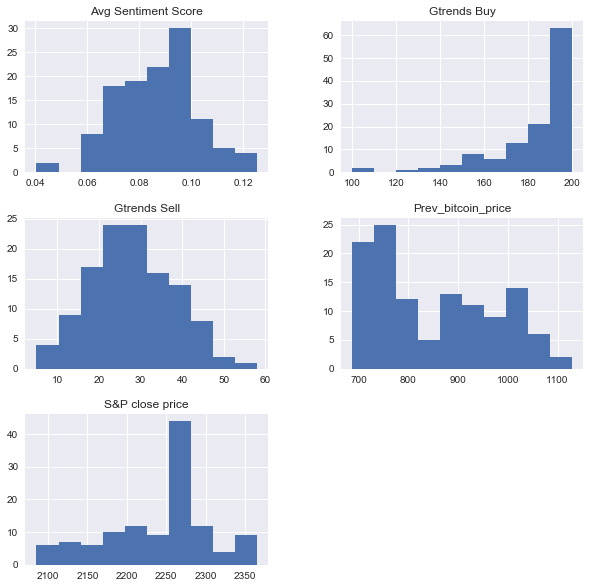

In [71]:
X.hist(figsize=(10,10))
plt.show()

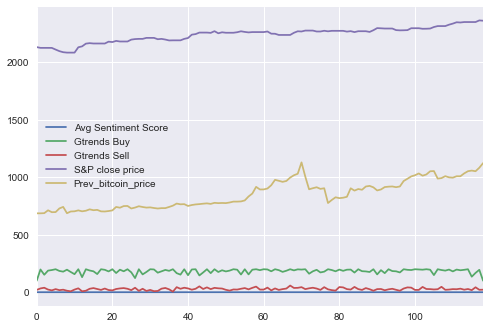

In [72]:
X.plot()
plt.show()

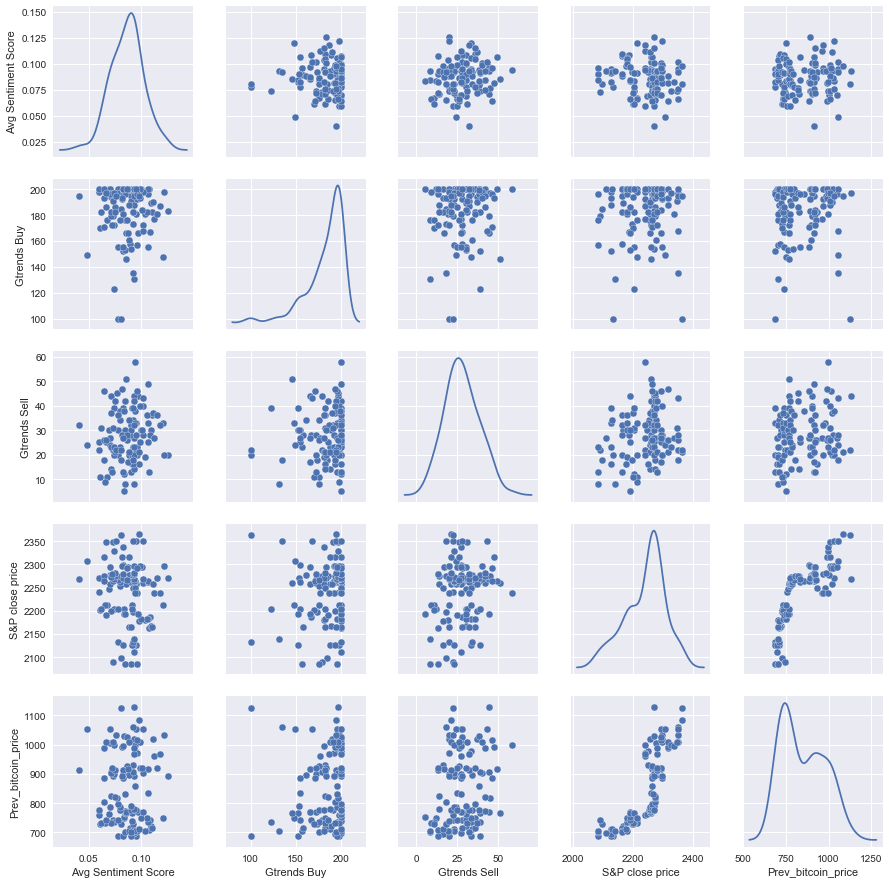

In [73]:
sns.pairplot(X,diag_kind='kde')
plt.show()

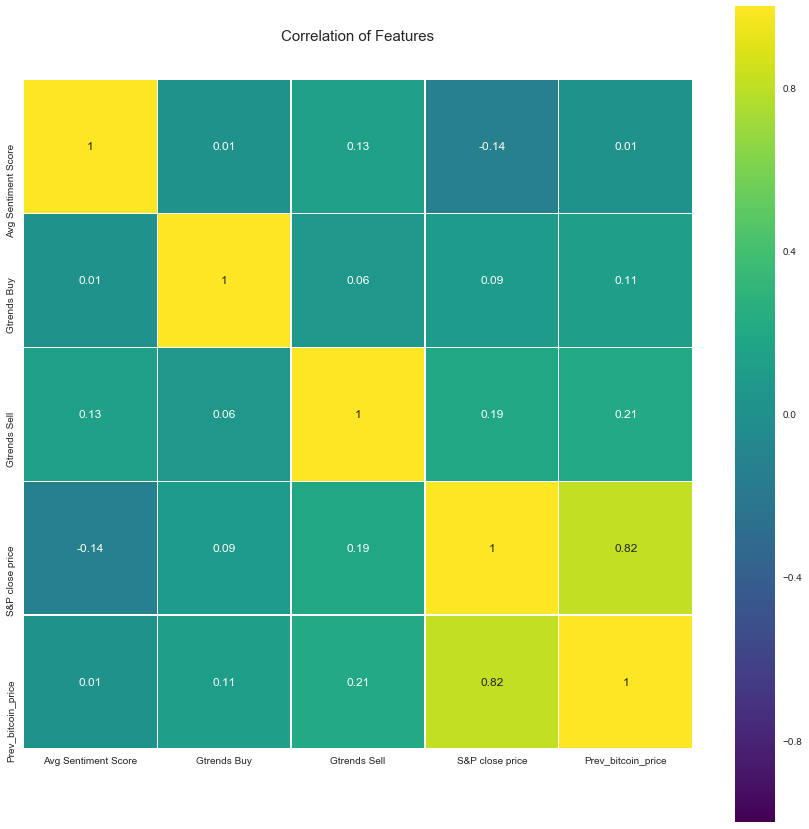

In [74]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(X.astype(float).corr().round(2)\
            ,linewidths=0.1, square=True,vmax=1.0, cmap=colormap, linecolor='white', annot=True)
plt.show()

## Normalize data

In [75]:
#Not using date and returns as features

In [76]:
x = X.values
y = Y.values

In [77]:
from sklearn import preprocessing

#x = master.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [78]:
df.columns = X.columns
#df.columns = master.columns[[1,2,3,6,7]]

In [79]:
df.head()

,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,S&P close price,Prev_bitcoin_price
0,0.441381,0.00,0.283019,0.170807,0.000000
1,0.646445,0.98,0.528302,0.147145,0.000000
2,0.499848,0.52,0.641509,0.147145,0.003564
3,0.604420,0.88,0.339623,0.147145,0.059434
4,0.593931,0.93,0.207547,0.146217,0.022172


In [80]:
df.describe()

,Avg Sentiment Score,Gtrends Buy,Gtrends Sell,S&P close price,Prev_bitcoin_price
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.544559,0.834538,0.429998,0.559739,0.372165
std,0.179225,0.203981,0.194457,0.234542,0.277713
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.412135,0.760000,0.292453,0.404408,0.124698
50%,0.563053,0.920000,0.415094,0.631157,0.306530
75%,0.645132,0.985000,0.547170,0.687884,0.626029
max,1.000000,1.000000,1.000000,1.000000,1.000000


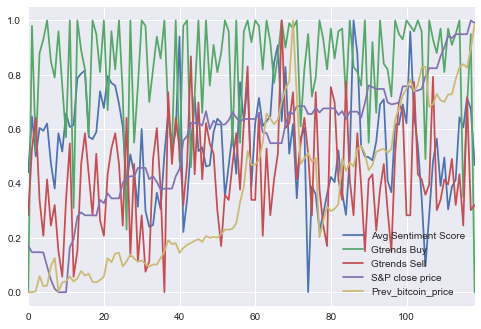

In [81]:
df.plot()
plt.show()

## Modeling

In [82]:
len(df)

119

In [83]:
# Splitting the dataset into the Training set and Test set (80/20)
# Reserving the latest 20% data for test
x_train = df.iloc[:94,:]
x_test = df.iloc[95:,:]
y_train = y[:94]
y_test = y[95:]

#x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
mod1 = LinearRegression()
mod1.fit(x_train, y_train)
# Predicting the Test set results
y_pred = mod1.predict(x_test)

In [103]:
y_pred_train = mod1.predict(x_train)
# The mean squared error
print("Mean squared error MSE on training set:",np.mean((y_pred_train - y_train) ** 2))
print("Mean squared error MSE on test set:",np.mean((y_pred - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(y_pred_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(y_pred - y_test)))
print("Absolute error wrt BTC price (Training):",100 *np.mean(np.abs(y_pred_train - y_train)/y_train), "%")
print("Absolute error wrt BTC price (Test):",100* np.mean(np.abs(y_pred - y_test)/y_test), "%")

Mean squared error MSE on training set: 796.4257849513602
Mean squared error MSE on test set: 625.1651859058335
Mean absolute error MAE on training set: 17.316325936973655
Mean absolute error MAE on test set: 21.71689300758622
Absolute error wrt BTC price (Training): 2.0595004823383407 %
Absolute error wrt BTC price (Test): 2.1175148102477688 %


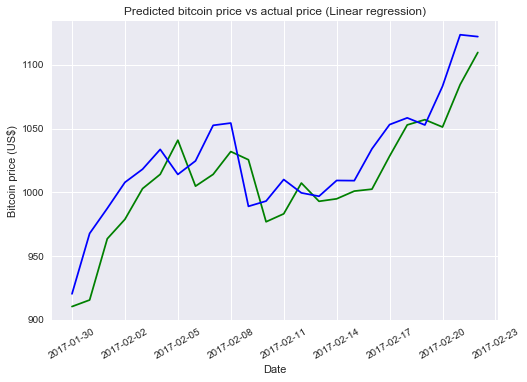

In [87]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_pred, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted bitcoin price vs actual price (Linear regression)')
plt.xlabel('Date')
plt.ylabel('Bitcoin price (US$)')
plt.show()

In [104]:
#Decision tree regressor
mod2 = DecisionTreeRegressor(random_state=0)
mod2.fit(x_train, y_train)
pred_mod2 = mod2.predict(x_test)
pred_mod2_train = mod2.predict(x_train)
# The mean squared error
print("Mean squared error on training set:",np.mean((pred_mod2_train - y_train) ** 2))
print("Mean squared error on test set:",np.mean((pred_mod2 - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(pred_mod2_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(pred_mod2 - y_test)))
print("Absolute error wrt BTC price (Training):",100 *np.mean(np.abs(pred_mod2_train - y_train)/y_train), "%")
print("Absolute error wrt BTC price (Test):",100* np.mean(np.abs(pred_mod2 - y_test)/y_test), "%")

Mean squared error on training set: 0.0
Mean squared error on test set: 17243.304650000005
Mean absolute error MAE on training set: 0.0
Mean absolute error MAE on test set: 122.51916666666669
Absolute error wrt BTC price (Training): 0.0 %
Absolute error wrt BTC price (Test): 11.806718558169688 %


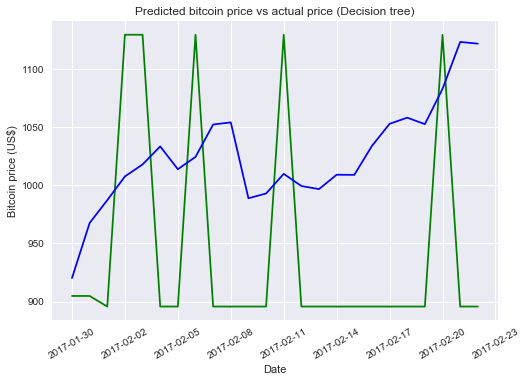

In [89]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), pred_mod2, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted bitcoin price vs actual price (Decision tree)')
plt.xlabel('Date')
plt.ylabel('Bitcoin price (US$)')
plt.show()

In [90]:
# Feature importance function

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    plt.xlabel('Importance Factor')
    plt.ylabel('Features')
    plt.title('Feature importance chart')
    plt.show()
    #print ('Training accuracy:',model.score( X , y ))

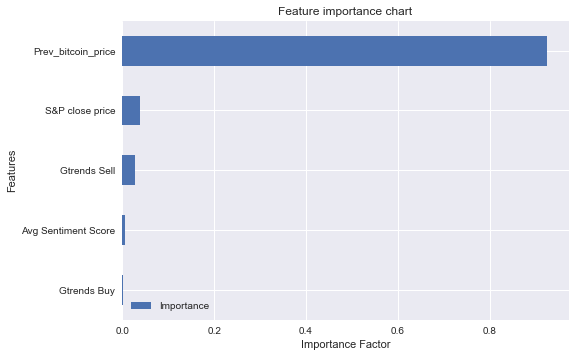

In [91]:
#Feature importance chart for decision tree
plot_model_var_imp(mod2, x_train, y_train)

In [105]:
#Random Forest regressor
mod3 = RandomForestRegressor(max_depth=2, random_state=0)
mod3.fit(x_train, y_train)
pred_mod3 = mod3.predict(x_test)
pred_mod3_train = mod3.predict(x_train)
# The mean squared error
print("Mean squared error on training set:",np.mean((pred_mod3_train - y_train) ** 2))
print("Mean squared error on test set:",np.mean((pred_mod3 - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(pred_mod3_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(pred_mod3 - y_test)))
print("Absolute error wrt BTC price (Training):",100 *np.mean(np.abs(pred_mod3_train - y_train)/y_train), "%")
print("Absolute error wrt BTC price (Test):",100* np.mean(np.abs(pred_mod3 - y_test)/y_test), "%")

Mean squared error on training set: 689.0949400521447
Mean squared error on test set: 3445.9260043701092
Mean absolute error MAE on training set: 18.65757901686387
Mean absolute error MAE on test set: 52.62890524897248
Absolute error wrt BTC price (Training): 2.291453576183374 %
Absolute error wrt BTC price (Test): 5.102663232193846 %


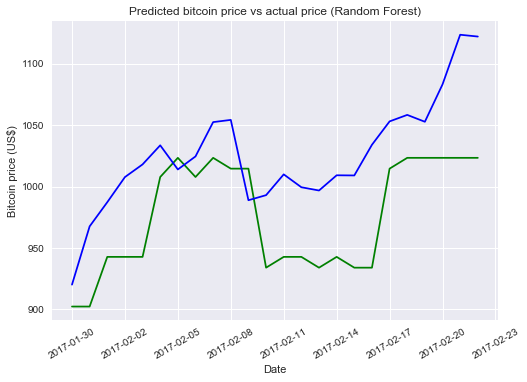

In [93]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), pred_mod3, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted bitcoin price vs actual price (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Bitcoin price (US$)')
plt.show()

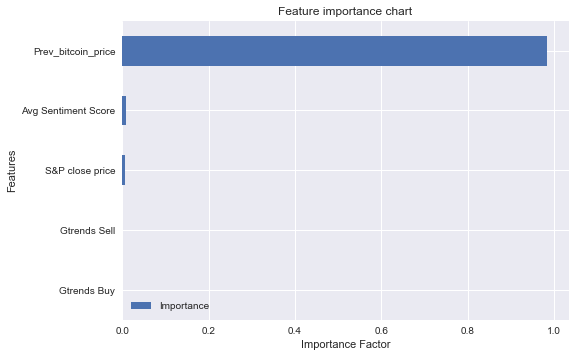

In [94]:
#Feature importance chart for random forest
plot_model_var_imp(mod3, x_train, y_train)

In [106]:
#Gradient boosting regression
mod4 = GradientBoostingRegressor()
mod4.fit(x_train, y_train)
pred_mod4 = mod4.predict(x_test)
pred_mod4_train = mod4.predict(x_train)
# The mean squared error
print("Mean squared error on training set:",np.mean((pred_mod4_train - y_train) ** 2))
print("Mean squared error on test set:",np.mean((pred_mod4 - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(pred_mod4_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(pred_mod4 - y_test)))
print("Absolute error wrt BTC price (Training):",100 *np.mean(np.abs(pred_mod4_train - y_train)/y_train), "%")
print("Absolute error wrt BTC price (Test):",100* np.mean(np.abs(pred_mod4 - y_test)/y_test), "%")

Mean squared error on training set: 14.498572761470088
Mean squared error on test set: 5082.460891281441
Mean absolute error MAE on training set: 2.9523185559643568
Mean absolute error MAE on test set: 56.11332141208576
Absolute error wrt BTC price (Training): 0.3702939457550303 %
Absolute error wrt BTC price (Test): 5.405974463259566 %


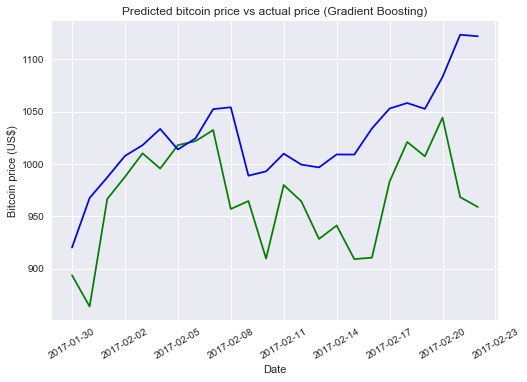

In [96]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), pred_mod4, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted bitcoin price vs actual price (Gradient Boosting)')
plt.xlabel('Date')
plt.ylabel('Bitcoin price (US$)')
plt.show()

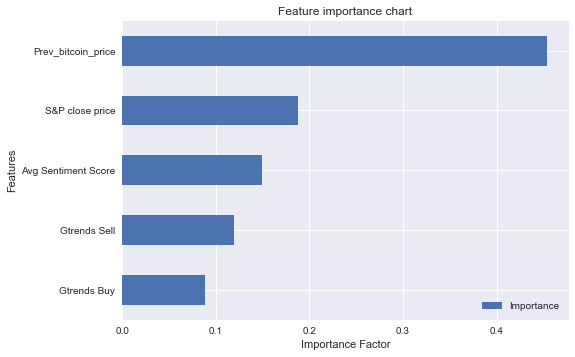

In [97]:
#Feature importance chart for boosting
plot_model_var_imp(mod4, x_train, y_train)

## Repeating the same as above but predicting returns now instead of BTC price

In [114]:
Y = master.iloc[:, 5]
y = Y.values

In [115]:
# Splitting the dataset into the Training set and Test set (80/20)
# Reserving the latest 20% data for test
x_train = df.iloc[:94,:]
x_test = df.iloc[95:,:]
y_train = y[:94]
y_test = y[95:]

In [116]:
mod1 = LinearRegression()
mod1.fit(x_train, y_train)
# Predicting the Test set results
y_pred = mod1.predict(x_test)

In [119]:
y_pred_train = mod1.predict(x_train)
# The mean squared error
print("Mean squared error MSE on training set:",np.mean((y_pred_train - y_train) ** 2))
print("Mean squared error MSE on test set:",np.mean((y_pred - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(y_pred_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(y_pred - y_test)))

Mean squared error MSE on training set: 0.0009329576200761896
Mean squared error MSE on test set: 0.0005857506746802871
Mean absolute error MAE on training set: 0.019636667963343526
Mean absolute error MAE on test set: 0.020852291367947043


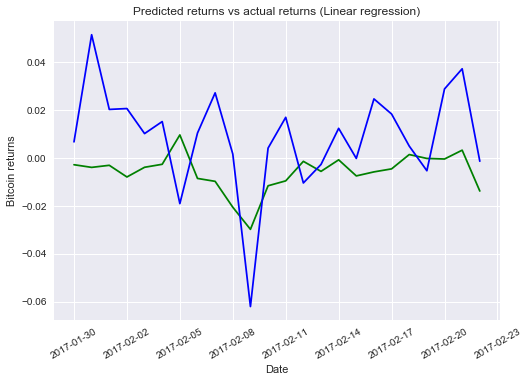

In [121]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_pred, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted returns vs actual returns (Linear regression)')
plt.xlabel('Date')
plt.ylabel('Bitcoin returns')
plt.show()

In [120]:
#Decision tree regressor
mod2 = DecisionTreeRegressor(random_state=0)
mod2.fit(x_train, y_train)
pred_mod2 = mod2.predict(x_test)
pred_mod2_train = mod2.predict(x_train)
# The mean squared error
print("Mean squared error on training set:",np.mean((pred_mod2_train - y_train) ** 2))
print("Mean squared error on test set:",np.mean((pred_mod2 - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(pred_mod2_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(pred_mod2 - y_test)))

Mean squared error on training set: 5.33518652278439e-09
Mean squared error on test set: 0.007515346392334058
Mean absolute error MAE on training set: 2.004887362563654e-05
Mean absolute error MAE on test set: 0.06153136622853952


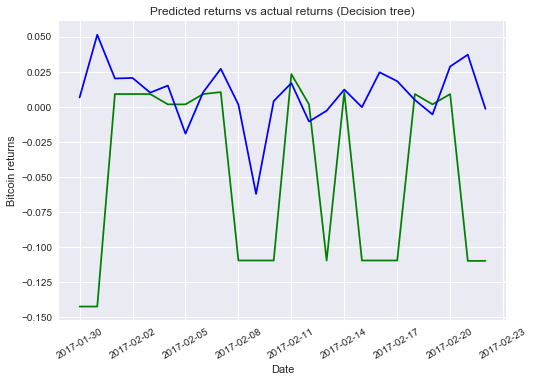

In [122]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), pred_mod2, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted returns vs actual returns (Decision tree)')
plt.xlabel('Date')
plt.ylabel('Bitcoin returns')
plt.show()

In [123]:
#Random Forest regressor
mod3 = RandomForestRegressor(max_depth=2, random_state=0)
mod3.fit(x_train, y_train)
pred_mod3 = mod3.predict(x_test)
pred_mod3_train = mod3.predict(x_train)
# The mean squared error
print("Mean squared error on training set:",np.mean((pred_mod3_train - y_train) ** 2))
print("Mean squared error on test set:",np.mean((pred_mod3 - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(pred_mod3_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(pred_mod3 - y_test)))

Mean squared error on training set: 0.0006631335962733743
Mean squared error on test set: 0.0010788934559152472
Mean absolute error MAE on training set: 0.01738617955821991
Mean absolute error MAE on test set: 0.027387778089117704


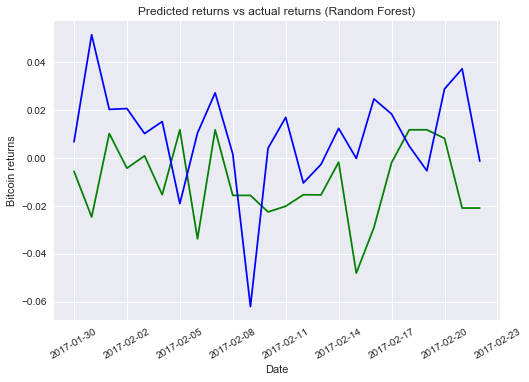

In [124]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), pred_mod3, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted returns vs actual returns (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Bitcoin returns')
plt.show()

In [125]:
#Gradient boosting regression
mod4 = GradientBoostingRegressor()
mod4.fit(x_train, y_train)
pred_mod4 = mod4.predict(x_test)
pred_mod4_train = mod4.predict(x_train)
# The mean squared error
print("Mean squared error on training set:",np.mean((pred_mod4_train - y_train) ** 2))
print("Mean squared error on test set:",np.mean((pred_mod4 - y_test) ** 2))
print("Mean absolute error MAE on training set:",np.mean(np.abs(pred_mod4_train - y_train)))
print("Mean absolute error MAE on test set:",np.mean(np.abs(pred_mod4 - y_test)))

Mean squared error on training set: 2.8604224267003625e-05
Mean squared error on test set: 0.003943039379069491
Mean absolute error MAE on training set: 0.00416379869687059
Mean absolute error MAE on test set: 0.051263317073943125


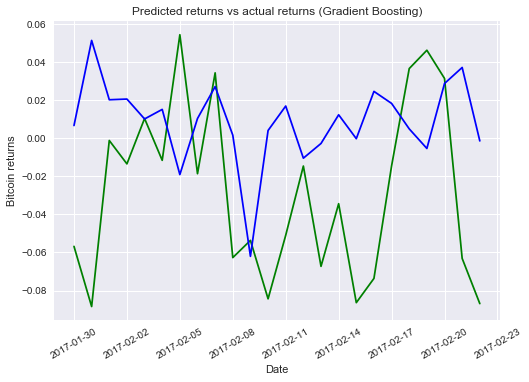

In [126]:
plt.plot(pd.to_datetime(master.iloc[95:119,0]), pred_mod4, c='green')
plt.plot(pd.to_datetime(master.iloc[95:119,0]), y_test, c='blue')
plt.xticks(rotation=30)
plt.title('Predicted returns vs actual returns (Gradient Boosting)')
plt.xlabel('Date')
plt.ylabel('Bitcoin returns')
plt.show()